<h1>Limpar aquivos 1k, 5k, 100k</h1>

<h2>Analisar estrutura de um tweet</h2>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

tab_1 = pd.read_json('1_tweet.json',lines=True,convert_dates=False)
tab_1

,_id,quote_count,contributors,truncated,text,is_quote_status,in_reply_to_status_id,reply_count,id,favorite_count,...,geo,in_reply_to_user_id_str,possibly_sensitive,lang,extended_tweet,created_at,filter_level,in_reply_to_status_id_str,place,control
0,{'$numberLong': '1240986591545393153'},0,NaN,True,Covid-19: quem vai colher os erros de Bolsonar...,False,NaN,0,{'$numberLong': '1240986591545393153'},0,...,NaN,NaN,False,pt,"{'display_text_range': [0, 223], 'entities': {...",{'$date': '2020-03-19T10:00:34.000-0300'},low,NaN,NaN,{'coleta': [439]}


In [2]:
tab_1['user']

0    {'follow_request_sent': None, 'profile_use_bac...
Name: user, dtype: object

<h2>Criar arquivo com tweets por usuário por dia</h2>

In [41]:
import nltk
import re
import pandas as pd
from IPython.display import clear_output
from collections import defaultdict
import matplotlib.pyplot as plt
from string import punctuation

#stopwords em portugues
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese') + list(punctuation) + ['“','”'])

#funçao pra limpeza de texto
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

In [2]:
#funçao pra leitura de dados e criaçao de dataframe
def json_to_dataframe(nome_json, colunas, chunk=30):
    dados = pd.read_json(nome_json, convert_dates = False, lines = True, chunksize = chunk)    
    
    for df_tweets_retweets in dados:
        yield df_tweets_retweets[colunas]

In [3]:
#funçao pra limpar texto e retirar stopwords
def tokenizar_texto(texto_tweet):
    texto_tokenizado = tweet_tokenizer.tokenize(texto_tweet)

    if texto_tokenizado[0] == "rt" and texto_tokenizado[1] == ":":
        del texto_tokenizado[0]
    
    palavras_sem_stopwords = [palavra for palavra in texto_tokenizado if palavra not in stopwords] 
    return palavras_sem_stopwords

In [4]:
#funçao pra criar dicionario com a data e quantidade dos tweets por usuario
def contagem_usuarios_data(gerador,destino):
    
    dict_datas_usuarios = defaultdict(dict)            
    
    for dataframe in gerador:        
        for linha in dataframe.values:            
            usuario = linha[0]['screen_name']

            data = linha[1]['$date'][:10]
            if data not in dict_datas_usuarios or usuario not in dict_datas_usuarios[data]:
                dict_datas_usuarios[data][usuario] = 0
            dict_datas_usuarios[data][usuario] += 1
            clear_output()
            
    escrever_arq_csv(dict_datas_usuarios,destino)

In [6]:
#funçao pra escrever os resultados no arquivo csv
def escrever_arq_csv(dict_datas_usuarios,destino):
    with open(destino, 'w', encoding="utf-8") as f:
        f.write("Datas;Usuários;Tweets\n")

        for key in dict_datas_usuarios.keys():
            for user in dict_datas_usuarios[key].keys():
                f.write("%s;%s;%s\n"%(key, user, dict_datas_usuarios[key][user]))
            
    print('A contagem de tweets por usuario por data foi salva com sucesso no arquivo')

In [8]:
#execuçao do codigo
#1k
gerador = json_to_dataframe('1k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_1k.csv')

A contagem de tweets por usuario por data foi salva com sucesso no arquivo


In [9]:
#5k
gerador = json_to_dataframe('5k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_5k.csv')

A contagem de tweets por usuario por data foi salva com sucesso no arquivo


In [10]:
#100k
gerador = json_to_dataframe('100k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_100k.csv')

A contagem de tweets por usuario por data foi salva com sucesso no arquivo


In [20]:
#100k
gerador = json_to_dataframe('100k_origin.json',["user","created_at"])

contagem_usuarios_data_2(gerador,'cont_usuarios_data_2.csv')

<h2>Fazer análises com arquivo gerado</h2>

### Análise do número de usuários por data no arquivo 100k

In [3]:
cont_usuarios_data = pd.read_csv('cont_usuarios_data_100k.csv', sep = ";")
cont_usuarios_data.head()

,Datas,Usuários,Tweets
0,2020-03-20,Naaclara0,1
1,2020-03-20,arcanjoOficial,1
2,2020-03-20,R_Ramba09,1
3,2020-03-20,RhysandAaron,1
4,2020-03-20,capartensucette,1


In [43]:
# nUMERO DE USUARIOS POR DATA
usuarios_por_data = cont_usuarios_data.groupby('Datas')['Usuários'].apply(len)
usuarios_por_data

Datas
2020-03-20    75820
Name: Usuários, dtype: int64

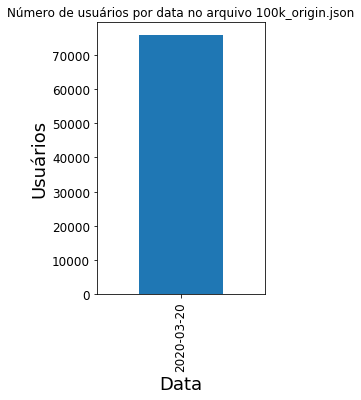

In [44]:
import matplotlib.pyplot as plt
grafico_barras = usuarios_por_data.plot(kind='bar', title ="Número de usuários por data no arquivo 100k_origin.json",figsize=(3,5),legend=False, fontsize=12)
grafico_barras.set_ylabel("Usuários",fontsize=18)
grafico_barras.set_xlabel("Data",fontsize=18)

plt.show()


### Análise do número de tweets por data no arquivo 100k

In [45]:
# NUMERO DE TWEETS POR DATA
tweets_por_data = cont_usuarios_data.groupby('Datas')['Tweets'].apply(sum)
tweets_por_data

Datas
2020-03-20    100000
Name: Tweets, dtype: int64

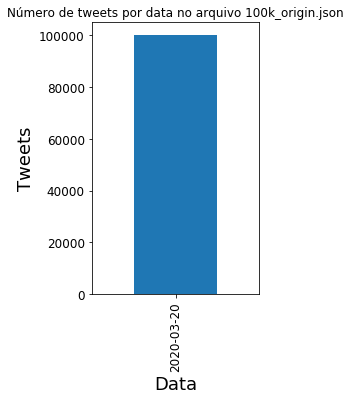

In [46]:
grafico_barras = tweets_por_data.plot(kind='bar', title ="Número de tweets por data no arquivo 100k_origin.json",figsize=(3,5),legend=False, fontsize=12)
grafico_barras.set_ylabel("Tweets",fontsize=18)
grafico_barras.set_xlabel("Data",fontsize=18)

plt.show()


### Análise de Tweets e Usuários por data no arquivo 100k

In [47]:
tweets = pd.DataFrame(tweets_por_data.copy())
tweets['Usuários'] = usuarios_por_data
tweets.reset_index(inplace=True)
tweets

,Datas,Tweets,Usuários
0,2020-03-20,100000,75820


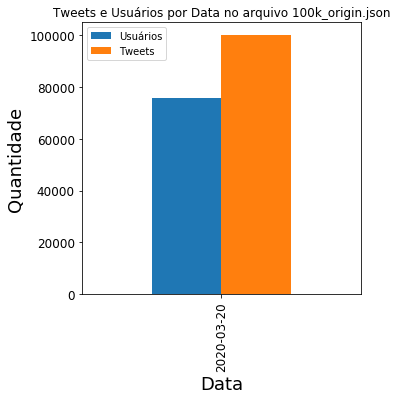

In [48]:
grafico_barras = tweets.plot(x ='Datas', y=['Usuários','Tweets'], kind='bar', title ="Tweets e Usuários por Data no arquivo 100k_origin.json",figsize=(5,5),legend=True, fontsize=12)
grafico_barras.set_xlabel("Data",fontsize=18)
grafico_barras.set_ylabel("Quantidade",fontsize=18)

plt.yscale("linear")
plt.show()

In [49]:
# TOP 50 USUARIOS QUE MAIS TWEETARAM NO GERAL
TOP50 = cont_usuarios_data.groupby('Usuários')['Tweets'].apply(sum).sort_values(ascending = False)[:50]
TOP50

Usuários
JornalDestak       80
gabieesteves       68
CoronaBotBR        53
MargaretteBras5    36
tadeu_alves        35
0Lake4             33
PrWilsonMartins    33
pedrobittar        33
ptribeirao         32
TellesCelso        32
Ary_AntiPT         31
___DENISE___EU_    31
gojammaj           31
tovaga             30
croismo            29
Emerson23530291    29
FabioIng           27
CacoBrasil2        25
feduambiental      24
ediiaa             23
worgtal            22
PTnaCamara         22
Marcelo1970Br      22
suruagymotta       22
Ate2026            21
Barukluiz          20
zecaribeiro7       20
Edvaldo71383333    20
sebastiaobarbar    19
saulsipiranga      19
MarilaneMonica     19
EuRetuitarei       19
klaudioRn          19
lcandido76         18
thiagofc1982       18
Naza_SB            18
robsongfreire      18
Arturdarocha       18
marconi21s         17
RecifeBot          17
Elciocb            17
andreraistlin      17
Denise_Olivieri    17
1DVoando           17
djwesleygonzaga    17
B

In [63]:
cont = cont_usuarios_data.set_index('Usuários').sort_values('Tweets', ascending = False)
cont.head()

,Datas,Tweets
Usuários,,
JornalDestak,2020-03-20,80
gabieesteves,2020-03-20,68
CoronaBotBR,2020-03-20,53
MargaretteBras5,2020-03-20,36
tadeu_alves,2020-03-20,35


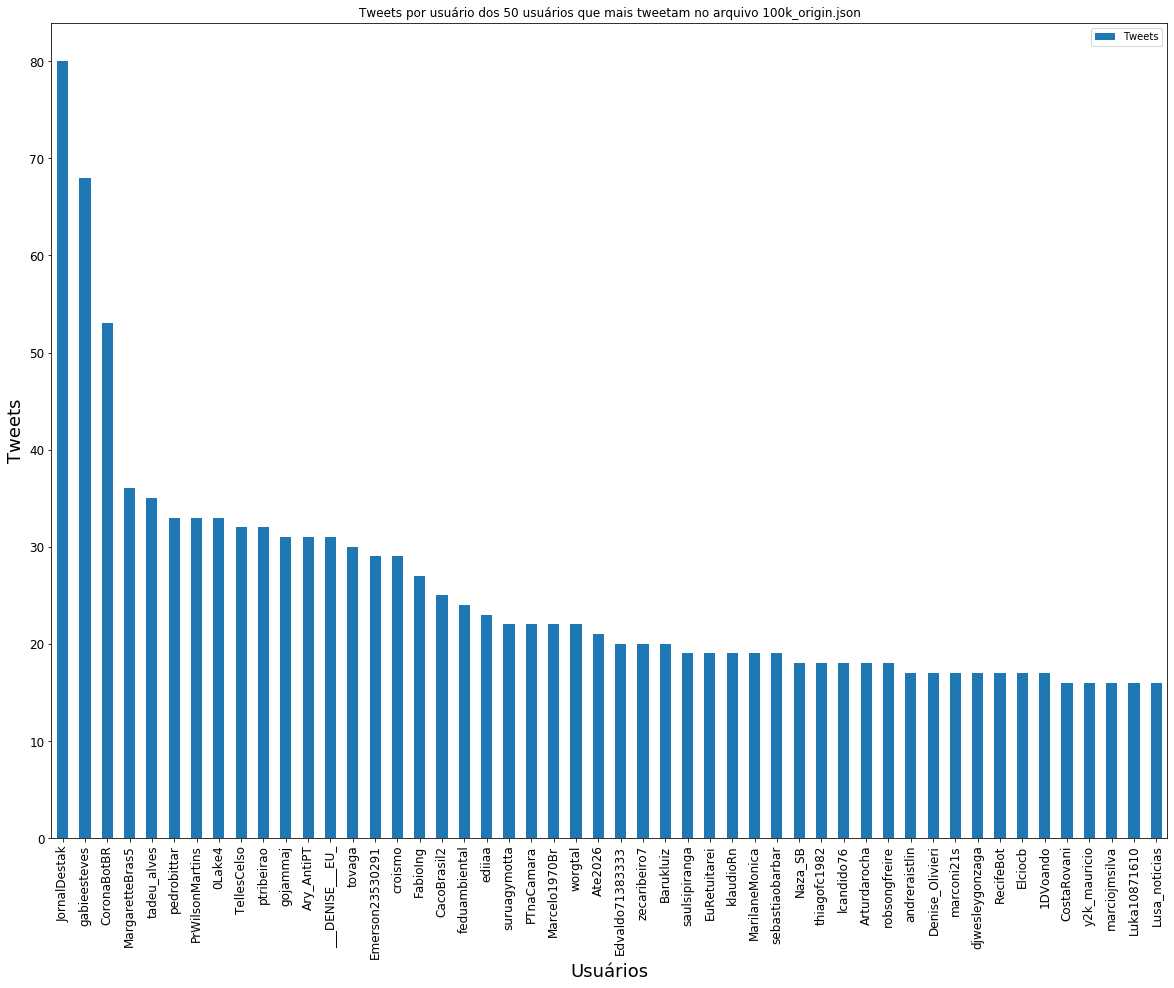

In [65]:
grafico_barras = cont[:50].plot(kind='bar', title ="Tweets por usuário dos 50 usuários que mais tweetam no arquivo 100k_origin.json",figsize=(20,15),legend=True, fontsize=12)
grafico_barras.set_xlabel("Usuários",fontsize=18)
grafico_barras.set_ylabel("Tweets",fontsize=18)

plt.show()

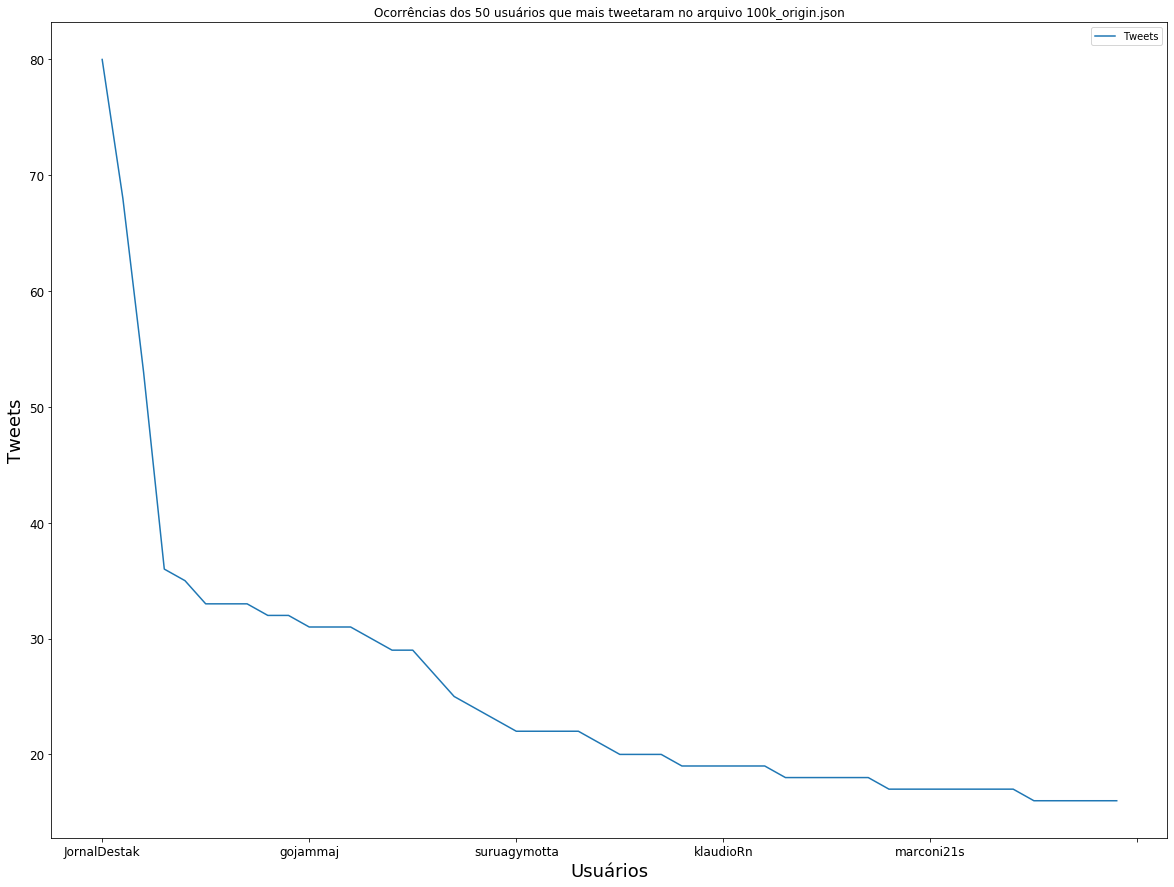

In [66]:
grafico_barras = cont[:50].plot(kind='line', title ="Ocorrências dos 50 usuários que mais tweetaram no arquivo 100k_origin.json",figsize=(20,15),legend=True, fontsize=12)
grafico_barras.set_xlabel("Usuários",fontsize=18)
grafico_barras.set_ylabel("Tweets",fontsize=18)

plt.show()

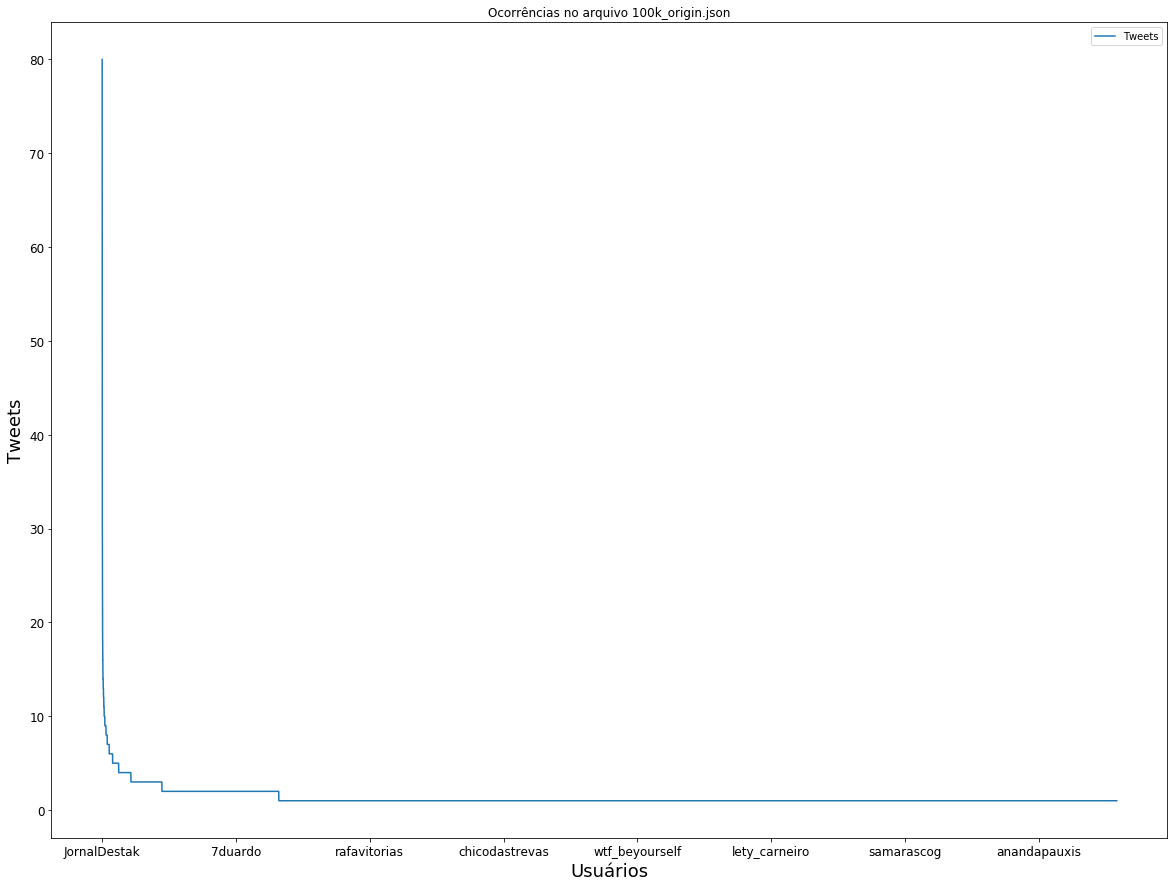

In [68]:
grafico_barras = cont.plot(kind='line', title ="Ocorrências no arquivo 100k_origin.json",figsize=(20,15),legend=True, fontsize=12)
grafico_barras.set_xlabel("Usuários",fontsize=18)
grafico_barras.set_ylabel("Tweets",fontsize=18)

plt.show()

## Teste com Outra estruturação de dados

### Organizando dados  com usuarios como indice e colunas com a quantidade de tweets com a data

In [4]:
cont_usuarios_data

,Datas,Usuários,Tweets
0,2020-03-20,Naaclara0,1
1,2020-03-20,arcanjoOficial,1
2,2020-03-20,R_Ramba09,1
3,2020-03-20,RhysandAaron,1
4,2020-03-20,capartensucette,1
...,...,...,...
75815,2020-03-20,porrajapinhaa,1
75816,2020-03-20,pgscarvalho,1
75817,2020-03-20,taugtss,1
75818,2020-03-20,noticiasdoac,1


In [6]:
datas = []
for i in cont_usuarios_data.Datas.values:
    if i not in datas:
        datas.append(i)
datas

['2020-03-20']

In [7]:
new = pd.DataFrame(index=cont_usuarios_data.Usuários,columns=datas)
df = cont_usuarios_data.set_index(['Datas','Usuários'])

In [8]:
for data in datas:
    for data_usuario in df.index:
        new[data_usuario[0]][data_usuario[1]] = df['Tweets'][data_usuario]
new # Visualização dos Dados após Reestruturação

,2020-03-20
Usuários,
Naaclara0,1
arcanjoOficial,1
R_Ramba09,1
RhysandAaron,1
capartensucette,1
...,...
porrajapinhaa,1
pgscarvalho,1
taugtss,1


### Com essa nova estruturação plotar quantidades de tweets por data dos 15 usuários que mais tweetaram 

#### OBS.: <ul><li>Devido às limitações do arquivo utilizado, o gráfico não apresenta informações úteis com somente uma data;</li><li>A quantidade de usuários plotado foi limitado aos 15 ou 50 que mais tweetaram (no  dia 2020-03-20 pois atualmente é a única data, mas pode ser uma soma total das colunas para uma tabela maior) para facilitar a visualização.</li></ul>

C:\Users\vicda\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:572: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000211ED5DB400> has a label of '___DENISE___EU_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


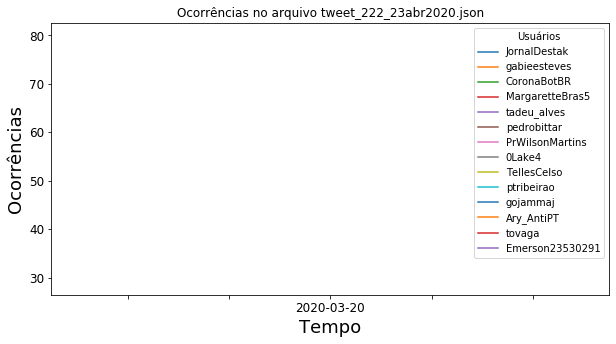

In [58]:
grafico = new.sort_values('2020-03-20',ascending=False)[:15].T.plot(kind='line', title ="Ocorrências no arquivo tweet_222_23abr2020.json",figsize=(10,5),legend=True, fontsize=12)
grafico.set_xlabel("Tempo",fontsize=18)
grafico.set_ylabel("Ocorrências",fontsize=18)

plt.show()

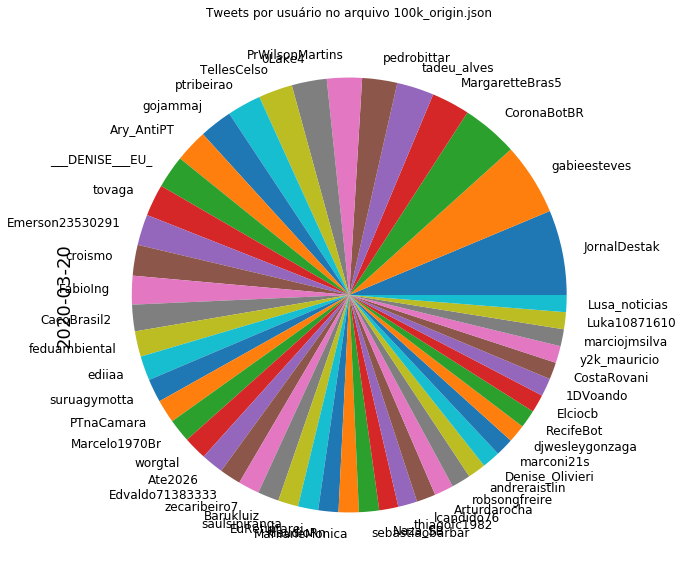

In [57]:
grafico = new.sort_values('2020-03-20',ascending=False)[:50].plot(y='2020-03-20',kind='pie', title ="Tweets por usuário no arquivo 100k_origin.json",figsize=(15,10),legend=False, fontsize=12)
grafico.set_ylabel("2020-03-20",fontsize=18)

plt.show()

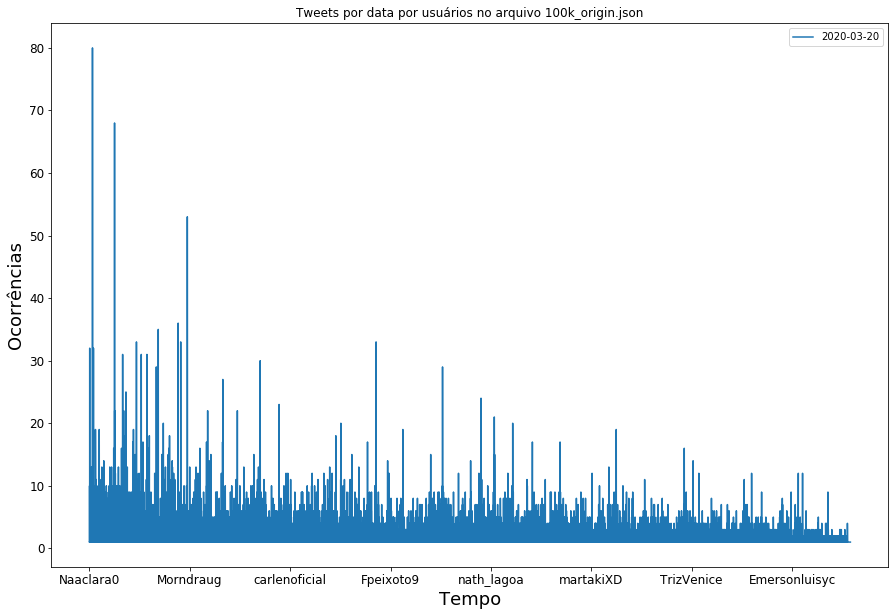

In [56]:
grafico = new.plot(kind='line', title ="Tweets por data por usuários no arquivo 100k_origin.json",figsize=(15,10),legend=True, fontsize=12)
grafico.set_xlabel("Tempo",fontsize=18)
grafico.set_ylabel("Ocorrências",fontsize=18)

plt.show()